In [1]:
# import the pyidw package.
from pyidw import idw

# import mean_squared_error from scikit-learn for using with accuracy assessment functions. 
from sklearn.metrics import mean_squared_error

# import other libraries for data opening and visualization, 
# importing these are not essential for core pyidw functionalities.
import geopandas as gpd
import rasterio
from matplotlib import pyplot as plt

In [2]:
point_file = gpd.read_file("radiasi_point.shp")
point_file

,MEAN_X,MEAN_Y,spt,Radiasi,Bulan,geometry
0,110.151778,-7.598635,3,118.5,Agustus,POINT (406434.129 9159981.684)
1,110.181452,-7.600729,2,118.5,Agustus,POINT (409708.125 9159756.404)
2,110.228624,-7.575690,1,118.5,Agustus,POINT (414906.873 9162534.238)
3,110.235231,-7.408514,7,124.8,Agustus,POINT (415603.685 9181018.330)
4,110.180655,-7.643306,6,118.5,Agustus,POINT (409629.163 9155048.964)
5,110.080740,-7.568017,5,118.5,Agustus,POINT (398590.270 9163350.854)
6,110.161540,-7.597674,4,124.8,Agustus,POINT (407510.906 9160089.965)
7,110.174696,-7.495147,11,118.5,Agustus,POINT (408940.739 9171428.237)
8,110.261501,-7.565325,10,124.8,Agustus,POINT (418531.898 9163686.500)
9,110.290914,-7.365595,9,208.9,Agustus,POINT (421741.340 9185773.475)


In [3]:
gdf = gpd.read_file("radiasi_point.shp")
bd = gpd.read_file("cuaca_geom.shp")

In [14]:
bd


,kabupaten_,geometry
0,MAGELANG,"POLYGON ((413799.484 9154402.841, 413790.208 9..."


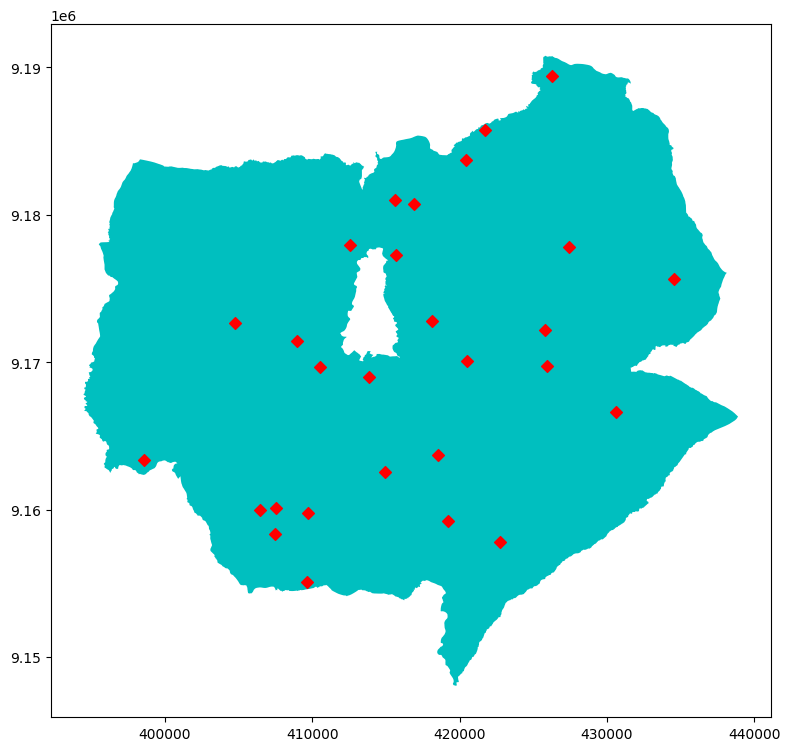

In [6]:
gdf = gpd.read_file("radiasi_point.shp")
bd = gpd.read_file("cuaca_geom.shp")

fig, ax = plt.subplots(figsize=(10,9))
bd.plot(ax=ax, color='c')
gdf.plot(ax=ax, marker='D', color='r')
plt.show()

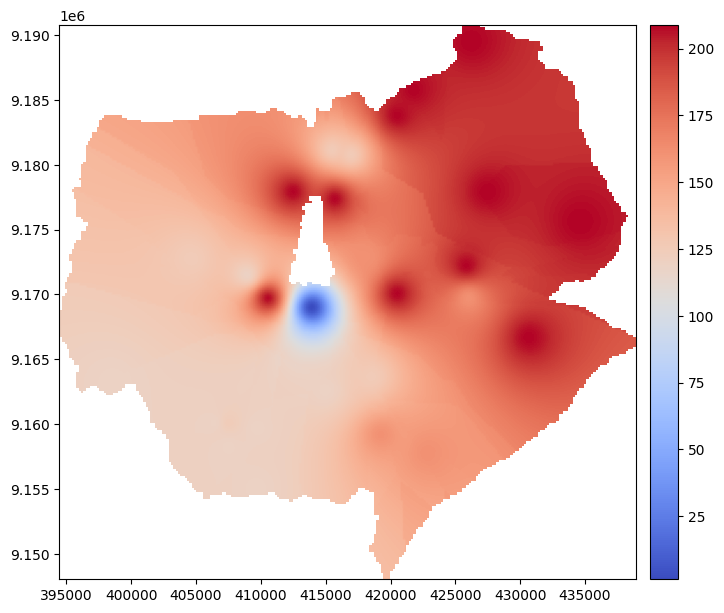

In [20]:
idw.idw_interpolation(
    input_point_shapefile="radiasi_point.shp",
    extent_shapefile="cuaca_geom.shp",
    column_name="Radiasi",
    power=2,
    search_radious=12,
    output_resolution=250,
)

In [10]:
from pyidw import idw
from sklearn.metrics import mean_squared_error

original_value, interpolated_value = idw.accuracy_standard_idw(
    input_point_shapefile="radiasi_point.shp",
    extent_shapefile="cuaca_geom.shp",
    column_name="Radiasi",
    power=2,
    search_radious=6,
    output_resolution=250,
)

print("RMSE:", mean_squared_error(original_value, interpolated_value, squared=False))

RMSE: 69.13100762772119


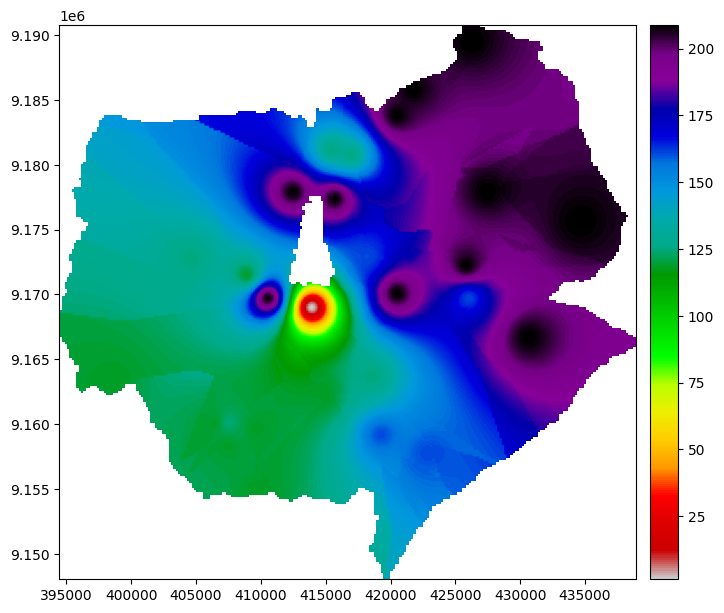

In [12]:
from pyidw import idw

idw.show_map(
    input_raster="radiasi_point_idw.tif",
    colormap="nipy_spectral_r",
    image_size=1.5,
    return_figure=False)

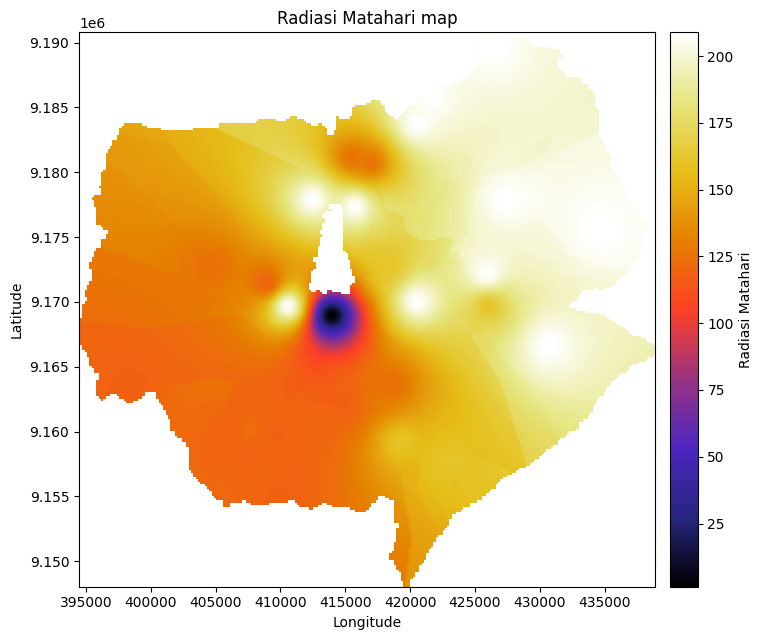

In [13]:
from pyidw import idw
from matplotlib import pyplot as plt

fig, ax, cbar = idw.show_map(
    input_raster="radiasi_point_idw.tif",
    colormap="CMRmap",
    image_size=1.5,
    return_figure=True)

ax.set_title("Radiasi Matahari map")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
cbar.set_label("Radiasi Matahari")
plt.show()

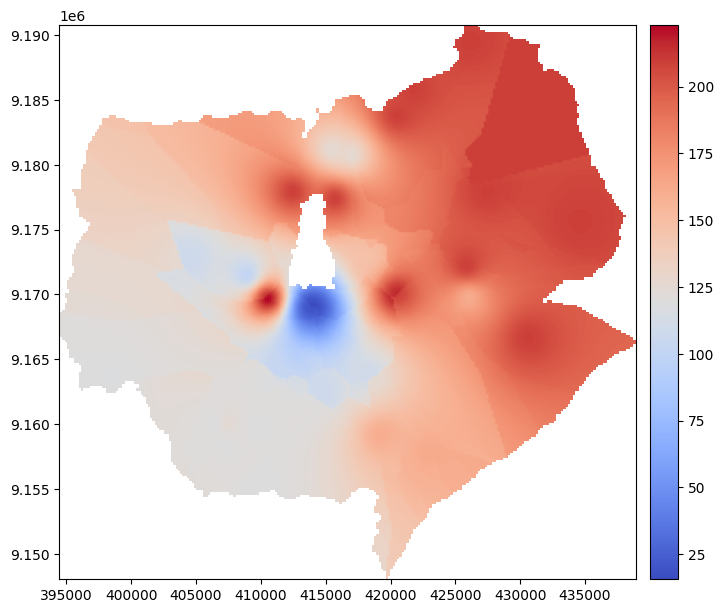

In [15]:
from pyidw import idw

idw.regression_idw_interpolation(
    input_point_shapefile="radiasi_point.shp",
    input_raster_file="radiasi_point_idw.tif",
    extent_shapefile="cuaca_geom.shp",
    column_name="Radiasi",
    power=2,
    polynomial_degree=1,
    search_radious=5,
    output_resolution=250,
)

In [16]:
from pyidw import idw
from sklearn.metrics import mean_squared_error

original_value, interpolated_value = idw.accuracy_regression_idw(
    input_point_shapefile="radiasi_point.shp",
    input_raster_file="radiasi_point_idw.tif",
    extent_shapefile="cuaca_geom.shp",
    column_name="Radiasi",
    power=2,
    polynomial_degree=1,
    search_radious=5,
    output_resolution=250,
)

print("RMSE:", mean_squared_error(original_value, interpolated_value, squared=False))

RMSE: 13.744692708432058
